# PCA (Digits Data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("digits.csv")

In [3]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
df.shape

(1797, 65)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pixel_0_0     1797 non-null   float64
 1   pixel_0_1     1797 non-null   float64
 2   pixel_0_2     1797 non-null   float64
 3   pixel_0_3     1797 non-null   float64
 4   pixel_0_4     1797 non-null   float64
 5   pixel_0_5     1797 non-null   float64
 6   pixel_0_6     1797 non-null   float64
 7   pixel_0_7     1797 non-null   float64
 8   pixel_1_0     1797 non-null   float64
 9   pixel_1_1     1797 non-null   float64
 10  pixel_1_2     1797 non-null   float64
 11  pixel_1_3     1797 non-null   float64
 12  pixel_1_4     1797 non-null   float64
 13  pixel_1_5     1797 non-null   float64
 14  pixel_1_6     1797 non-null   float64
 15  pixel_1_7     1797 non-null   float64
 16  pixel_2_0     1797 non-null   float64
 17  pixel_2_1     1797 non-null   float64
 18  pixel_2_2     1797 non-null 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_4,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0
pixel_7_7,1797.0,0.364496,1.860122,0.0,0.0,0.0,0.0,16.0


### Scalling:

In [7]:
sc = StandardScaler()

In [8]:
temp = sc.fit_transform(df.drop("number_label", axis= 1))

In [9]:
x = pd.DataFrame(temp, columns= df.drop("number_label", axis= 1).columns)

In [11]:
x.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


In [12]:
x.shape

(1797, 64)

### PCA:

In [13]:
# We will see at how many components we can capture how much variance.

In [16]:
variance_list = []

for comp in range(1,65):
    
    pca_model = PCA(n_components= comp)
    
    pca_model.fit_transform(x)
    
    variance_list.append(np.sum(pca_model.explained_variance_ratio_))

In [17]:
variance_list

[0.12033916097649389,
 0.21594970499008107,
 0.3003938537392272,
 0.3653779313622445,
 0.41397941995663,
 0.4561205921308711,
 0.49552506734429097,
 0.5294097440257425,
 0.5593581081309246,
 0.5882822453275461,
 0.616512454823636,
 0.6422790647451453,
 0.6650113429536086,
 0.6873180703135489,
 0.708933202776997,
 0.7281245560690821,
 0.7458448522792945,
 0.7622168253403758,
 0.778211913753135,
 0.7931038482460065,
 0.8065769936898576,
 0.8193176236425864,
 0.8309434830846947,
 0.8414773326155884,
 0.8512562642408161,
 0.8606605122456541,
 0.8693404474490907,
 0.8776756038781502,
 0.8855356239409018,
 0.8931704399893258,
 0.9003683817996069,
 0.9073530586992324,
 0.9138609721583106,
 0.9202879380923545,
 0.9262246254615717,
 0.9319233308570882,
 0.9371829090972217,
 0.9419903732695684,
 0.9465349926540827,
 0.9507612049917521,
 0.9548257475140592,
 0.9587972226884158,
 0.9623717368237863,
 0.9657751200912407,
 0.9690537430648364,
 0.9721442075203506,
 0.975053731213612,
 0.9778194604500

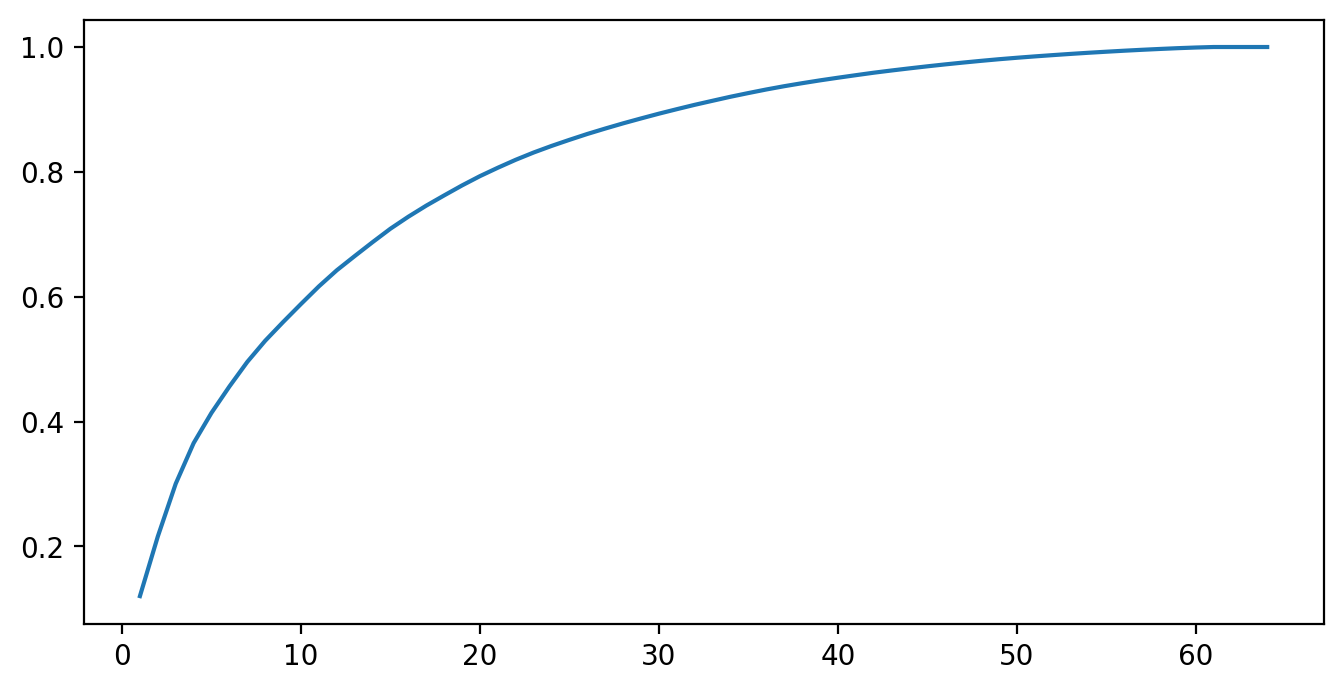

In [18]:
plt.figure(figsize=(8,4), dpi= 200)
plt.plot(range(1,65), variance_list)
plt.show()

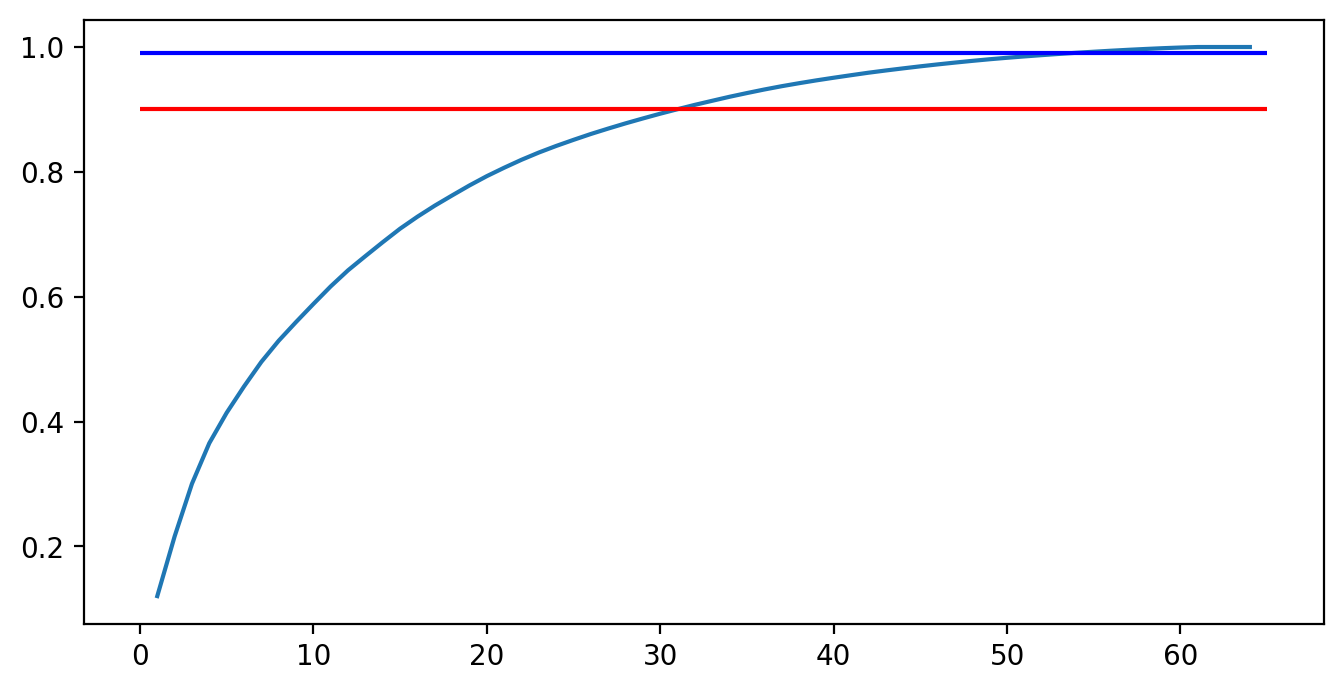

In [19]:
plt.figure(figsize=(8,4), dpi= 200)
plt.plot(range(1,65), variance_list)

plt.hlines(y= 0.9, xmin=0, xmax= 65, color= "red")

plt.hlines(y= 0.99, xmin=0, xmax= 65, color= "blue")
plt.show()

In [20]:
# So, at 31 Components, we can capture 90% variance.
# At at 55 components, we can capture 99% variance.

## Extra:

- This Dataset is about Digits.

- Each Row Describes Pixel values of Digit in a 8 * 8 Image, thats why we have 64 columns, plus one more column for Label.

- Let's See if we can display numbers on an Image.

In [21]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [22]:
df["number_label"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [59]:
# we will Capture One Row for 0 and Display it:

In [44]:
df[df["number_label"] == 0]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0,0
20,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0,0
30,0.0,0.0,10.0,14.0,11.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,11.0,16.0,12.0,3.0,0.0,0.0,0
36,0.0,0.0,6.0,14.0,10.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,16.0,11.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,0.0,0.0,10.0,11.0,7.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,12.0,8.0,0.0,0.0,0.0,0
1745,0.0,0.0,7.0,14.0,8.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,7.0,0.0,0.0,0.0,0
1746,0.0,0.0,9.0,15.0,6.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,8.0,15.0,11.0,4.0,0.0,0.0,0
1768,0.0,0.0,5.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,15.0,16.0,8.0,1.0,0.0,0


In [50]:
df[df["number_label"] == 0].iloc[0]

pixel_0_0        0.0
pixel_0_1        0.0
pixel_0_2        5.0
pixel_0_3       13.0
pixel_0_4        9.0
                ... 
pixel_7_4       10.0
pixel_7_5        0.0
pixel_7_6        0.0
pixel_7_7        0.0
number_label     0.0
Name: 0, Length: 65, dtype: float64

In [53]:
(df[df["number_label"] == 0].iloc[0])[0:-1]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [54]:
np.array((df[df["number_label"] == 0].iloc[0])[0:-1])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [55]:
np.array((df[df["number_label"] == 0].iloc[0])[0:-1]).shape

(64,)

In [56]:
np.array((df[df["number_label"] == 0].iloc[0])[0:-1]).reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

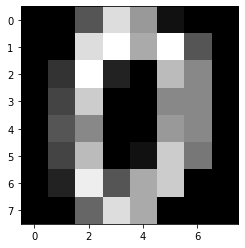

In [63]:
plt.imshow(np.array((df[df["number_label"] == 0].iloc[0])[0:-1]).reshape(8,8), cmap= "gray")
plt.show()

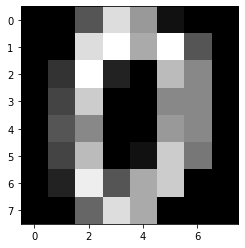

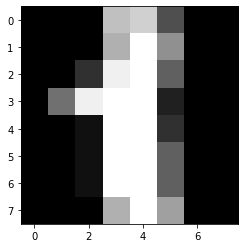

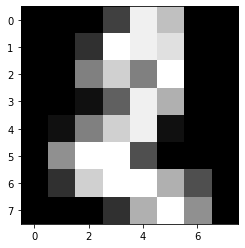

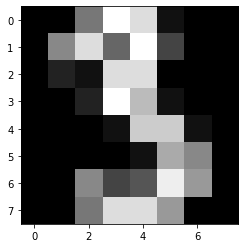

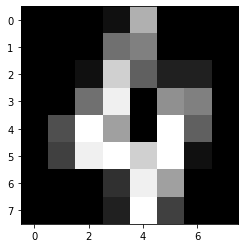

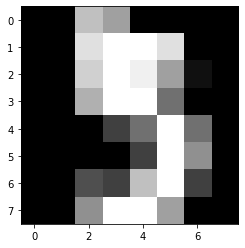

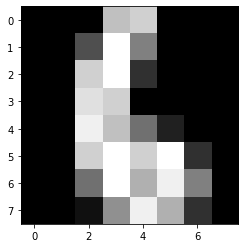

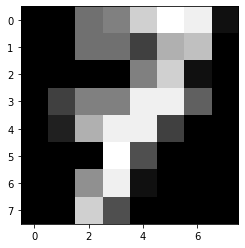

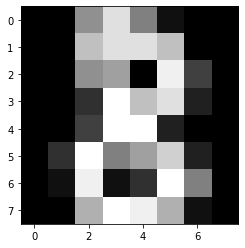

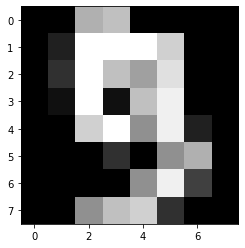

In [62]:
# Let's Dispaly all Numbers like this by a Loop:

for num in range(0,10):
    
    plt.imshow(np.array((df[df["number_label"] == num].iloc[0])[0:-1]).reshape(8,8), cmap= "gray")
    plt.show()   